# 量子デバイス（QPU）の特性の違いを理解する
それぞれのデバイスでは、使えるゲートが異なります。Amazon Braket では前述の `braket.circuits` クラスで回路とゲート操作が定義されており、`Circuit()` で作成した回路に対してゲート操作ができます。Simulator は全てのゲートを利用可能ですが、QPU によってはサポートされているゲートが異なります。

## シミュレータで利用できる回路演算について
SV1 などのシミュレータでは、[Amazon Braket SDK で実装されているゲートが全て利用可能](https://docs.aws.amazon.com/braket/latest/developerguide/braket-constructing-circuit.html)です。サポートしている演算（ユニタリーオペレータ）を表示します

In [1]:
from braket.circuits import Gate
from braket.aws import AwsDevice
import string
import networkx as nx

# print all (the usual suspects) available gates currently available within SDK
gate_set = [attr for attr in dir(Gate) if attr[0] in string.ascii_uppercase]
print('Gate set supported by SDK:\n', gate_set)
print('\n')

Gate set supported by SDK:
 ['CCNot', 'CNot', 'CPhaseShift', 'CPhaseShift00', 'CPhaseShift01', 'CPhaseShift10', 'CSwap', 'CV', 'CY', 'CZ', 'ECR', 'GPi', 'GPi2', 'H', 'I', 'ISwap', 'MS', 'PSwap', 'PhaseShift', 'PulseGate', 'Rx', 'Ry', 'Rz', 'S', 'Si', 'Swap', 'T', 'Ti', 'Unitary', 'V', 'Vi', 'X', 'XX', 'XY', 'Y', 'YY', 'Z', 'ZZ']




---
## IonQ について
IonQ は、イオントラップという原理で作られた11量子ビットで構成されるデバイスです。

デバイスタイプとして、Rigetti の ARN `arn:aws:braket:us-east-1::device/qpu/ionq/Harmony` を指定し、このデバイスで利用できる量子ゲートのタイプと、量子ビット間の結合（トポロジー）について調べてみます。

In [2]:
# import the device module
from braket.aws import AwsDevice

device = AwsDevice("arn:aws:braket:us-east-1::device/qpu/ionq/Harmony")
supported_gates = device.properties.action['braket.ir.jaqcd.program'].supportedOperations
# print the supported gate set
print('Gate set supported by the IonQ device:\n', supported_gates)

Gate set supported by the IonQ device:
 ['x', 'y', 'z', 'rx', 'ry', 'rz', 'h', 'cnot', 's', 'si', 't', 'ti', 'v', 'vi', 'xx', 'yy', 'zz', 'swap']


{'fullyConnected': True, 'connectivityGraph': {}}


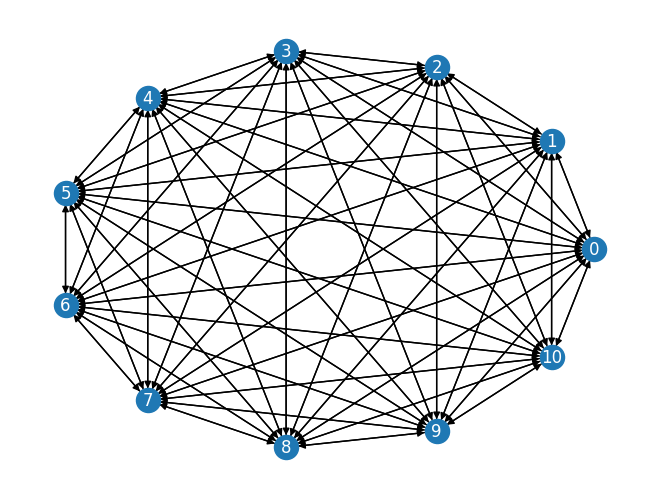

In [3]:
# access and visualize the device topology
# note that device topology can change day-to-day based on edge fidelity data
print(device.properties.dict()['paradigm']['connectivity'])
nx.draw_kamada_kawai(device.topology_graph, with_labels=True, font_color="white")

IonQ は、11量子ビットのそれぞれが他の全ての量子ビットと結合している、いわゆる全結合のトポロジーとなっています。そのため、任意の２量子ビットに対して、それぞれのデバイスに対してゲート操作が可能です。

---
## Rigetti について
Rigetti Aspen M-3 は、超伝導量子ビットで構成された80量子ビットのデバイスです。

デバイスタイプとして、Rigetti の ARN `arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-3` を指定します。

In [4]:
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-3")
supported_gates = device.properties.action['braket.ir.jaqcd.program'].supportedOperations
# print the supported gate set
print('Gate set supported by the Rigetti device:\n', supported_gates)

Gate set supported by the Rigetti device:
 ['cz', 'xy', 'ccnot', 'cnot', 'cphaseshift', 'cphaseshift00', 'cphaseshift01', 'cphaseshift10', 'cswap', 'h', 'i', 'iswap', 'phaseshift', 'pswap', 'rx', 'ry', 'rz', 's', 'si', 'swap', 't', 'ti', 'x', 'y', 'z', 'start_verbatim_box', 'end_verbatim_box']


{'fullyConnected': False, 'connectivityGraph': {'0': ['1', '7', '103'], '100': ['101', '107'], '10': ['11', '17', '113'], '110': ['111', '117'], '20': ['21', '27', '123'], '120': ['121', '127'], '30': ['31', '37', '133'], '130': ['131', '137'], '40': ['41', '47', '143'], '140': ['141', '147'], '1': ['0', '2', '16'], '101': ['100', '102'], '11': ['10', '12'], '111': ['110', '112', '126'], '21': ['20', '22', '36'], '121': ['120', '122'], '31': ['30', '32', '46'], '131': ['130', '132', '146'], '41': ['40', '42'], '141': ['140', '142'], '2': ['1', '3', '15'], '102': ['101', '103', '115'], '12': ['11', '13', '25'], '112': ['111', '113', '125'], '22': ['21', '23', '35'], '122': ['121', '123', '135'], '32': ['31', '33', '45'], '132': ['131', '133', '145'], '42': ['41', '43'], '142': ['141', '143'], '3': ['2', '4'], '103': ['102', '104', '0'], '13': ['12', '14'], '113': ['112', '114', '10'], '23': ['22', '24'], '123': ['122', '124', '20'], '33': ['32', '34'], '133': ['132', '134', '30'], '43':

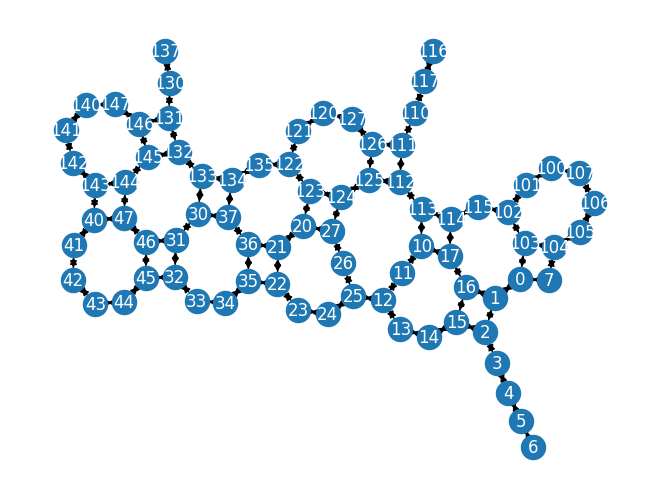

In [5]:
# access and visualize the device topology
# note that device topology can change day-to-day based on edge fidelity data
print(device.properties.dict()['paradigm']['connectivity'])
nx.draw_kamada_kawai(device.topology_graph, with_labels=True, font_color="white")

上記のように、Rigetti は 量子ビットがそれぞれ、２量子ビット、または３量子ビットに対して結合していることがわかります。この結合規則を見ながら、操作可能な量子ゲートをプログラミングして量子計算を実施する必要があります。

----
## Oxford Quantum Circuits (OQC) について
OQC の Lucy は超伝導量子ビットで構成された8量子ビットのデバイスです。

ARN `arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy` を指定します。

In [6]:
device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy")
supported_gates = device.properties.action['braket.ir.jaqcd.program'].supportedOperations
# print the supported gate set
print('Gate set supported by the OQC device:\n', supported_gates)

Gate set supported by the OQC device:
 ['ccnot', 'cnot', 'cphaseshift', 'cswap', 'cy', 'cz', 'h', 'i', 'phaseshift', 'rx', 'ry', 'rz', 's', 'si', 'swap', 't', 'ti', 'v', 'vi', 'x', 'y', 'z', 'ecr', 'start_verbatim_box', 'end_verbatim_box']


{'fullyConnected': False, 'connectivityGraph': {'0': ['1', '7'], '1': ['2'], '2': ['3'], '4': ['3', '5'], '6': ['5'], '7': ['6']}}


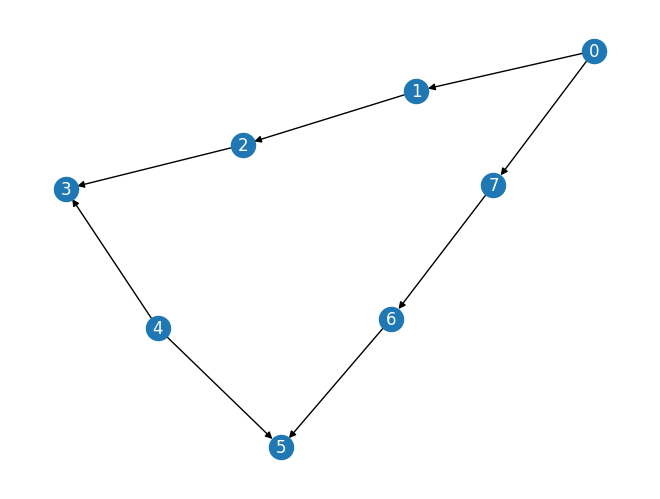

In [7]:
# access and visualize the device topology
# note that device topology can change day-to-day based on edge fidelity data
print(device.properties.dict()['paradigm']['connectivity'])
nx.draw_kamada_kawai(device.topology_graph, with_labels=True, font_color="white")

---

これで、QPU のそれぞれの特性を知ることができました。それぞれの QPU のデバイス特性を意識しながら、量子計算のコードを書いていきましょう。